Подключу необходимые библиотеки и файлы

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/Yuichir0/Telecom/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from thinkdsp import decorate, SquareSignal

### Упражнение 8.1
Блокнот для этой главыы - chap08.ipynb. Прочитайте его и запустите код.

В нём есть интерактивный виджет, где можно экспериментировать с параметрами гауссова окна и изучить их влияние на частоту среза.

Что слуится, если при увеличении ширины гауссова окна std не увеличивать число элементов в ок
### Упражнение 8.2
В этой главе утверждается, что преобразование Фурье гауссовой кривой - также гауссова кривая. Для дискретного преобразования Фурье это приблизительно верно.

Попробуйте его на нескольких примерах. Что происходит с преобразованием Фурье, если меняется std?не M?

### Решение

Начну с гауссова окна подобного примеру из учебника

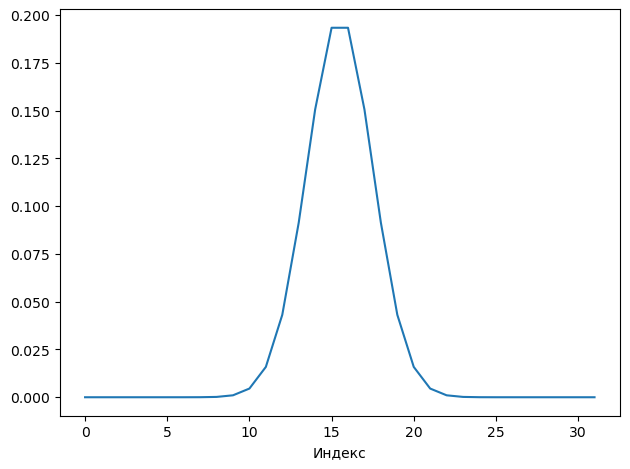

In [2]:
gaussian = scipy.signal.windows.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Индекс')

Построю БПФ

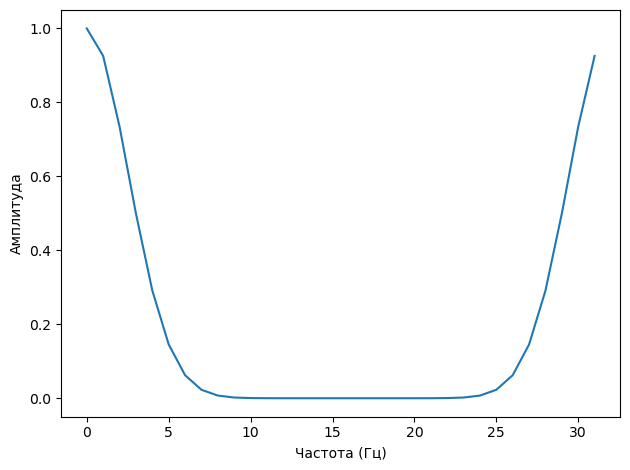

In [3]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

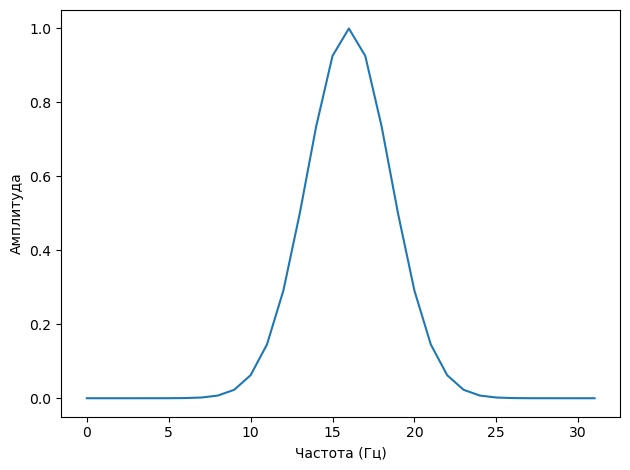

In [4]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

Отображу Гауссово преобразование и БПФ рядом

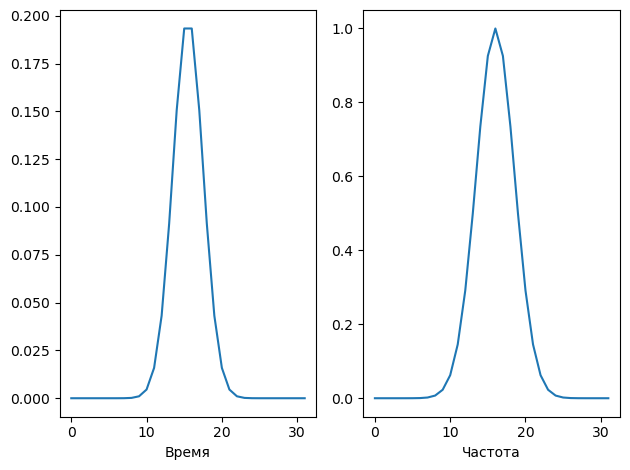

In [5]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Время')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Частота')
    plt.show()

plot_gaussian(2)

Видно, что по мере увеличения std и постоянном числе элементов М гауссово преобразование становится шире, а БПФ - уже.

### Упражнение 8.3
В упражнениях к главе 3 изучалось влияение на утечки спектра окна Хэмминга и некоторых других, предоставляемых NumPy. Глубже понять эти окна можно, изучив их ДПФ.

В дополнение к Гауссову окну, использованному в этой главе, создайте окно Хэмминга тех же размеров. Дополните окно нулями и напечатайте его ДПФ. Какое окно больше подходит для фильтра НЧ? Полезно напечатать ДПФ с логарифмическим масштабом по y.

Поэкспериментируйте с разными окнами и разными размерами этих окон.

### Решение

Создам окно Хэмминга

In [6]:
signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)
M = 15
std = 2.5

gaussian = scipy.signal.windows.gaussian(M=M, std=std)
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

Отображу окна

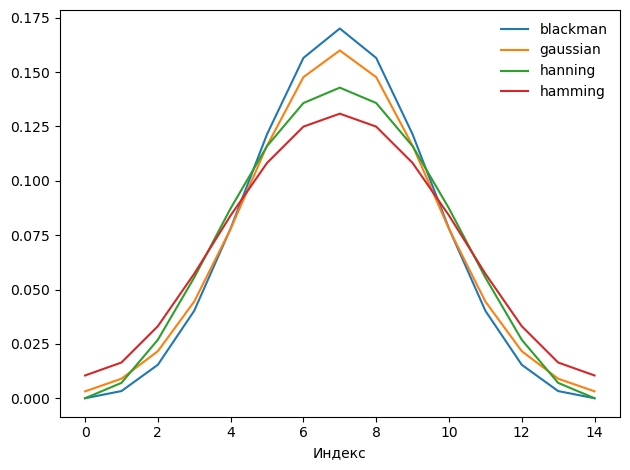

In [7]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Индекс')

Заполню окно нулями и напечатаю его ДПФ

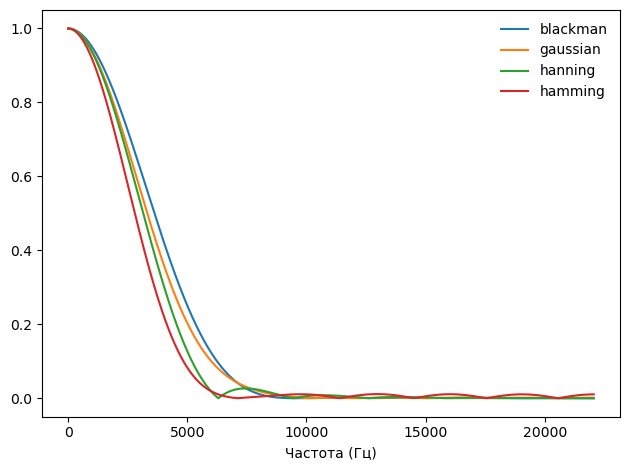

In [8]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

plot_window_dfts(windows, names)
decorate(xlabel='Частота (Гц)')

Окна весьма похожи, но можно отметить, что окно Хэмминга спадает быстрее всех, окно Блэкмана медленнее всех, а у окна Ханнинга самые заметные боковые лепестки.

Отображу логарифмический граф с такими же данными

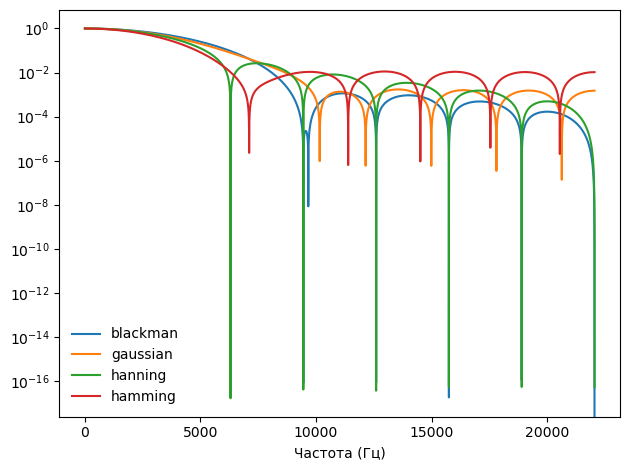

In [9]:
plot_window_dfts(windows, names)
decorate(xlabel='Частота (Гц)', yscale='log')

Видно, что окна Хэмминга и Ханнинга поначалу спадают быстрее, чем два других окна. А окна Хэмминга и Гаусса имеют самые стойкие боковые лепестки.

Окно Ханнинга имеет наилучшее сочетание быстрого снижения и минимальных боковых лепестков.